References:
1. Tyagi, D. (2019). Introduction to SURF (Speeded-Up Robust Features) [Computer software]. Retrieved from https://medium.com/data-breach/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e
2. OpenCV. Introduction to SURF (Speeded-Up Robust Features) [Computer software]. Retrieved from https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html

Install the specified version for the support of SURF in OpenCV

In [7]:
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.6 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 118.7 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

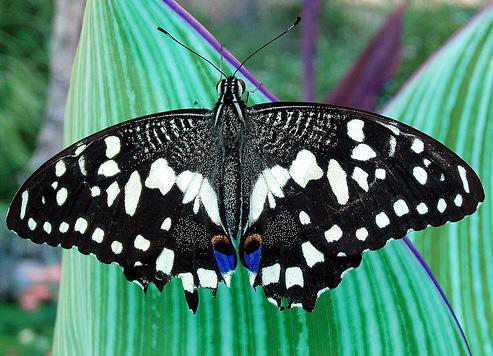

In [2]:
# image = io.imread('/content/lena_color.gif') 
image = io.imread('/content/fly.jpg')
cv2_imshow(image)

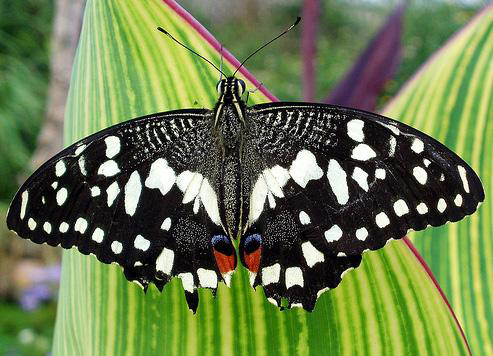

In [3]:
# convert the color format from BGR to RGB
training_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(training_image)

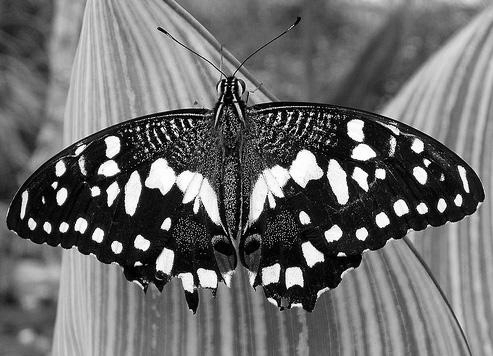

In [4]:
# convert the color format from RGB to GRAY
training_gray = cv.cvtColor(training_image, cv.COLOR_RGB2GRAY)
cv2_imshow(training_gray)

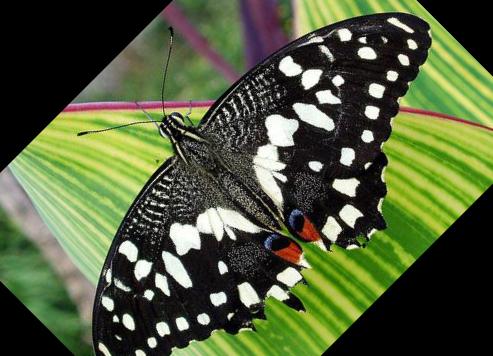

In [17]:
# create a 45 degrees rotated image 
num_rows, num_cols = training_image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((num_cols/2, num_rows/2), 45, 1)
test_image = cv.warpAffine(training_image, rotation_matrix, (num_cols, num_rows))
# cv2_imshow(training_image)
cv2_imshow(test_image)

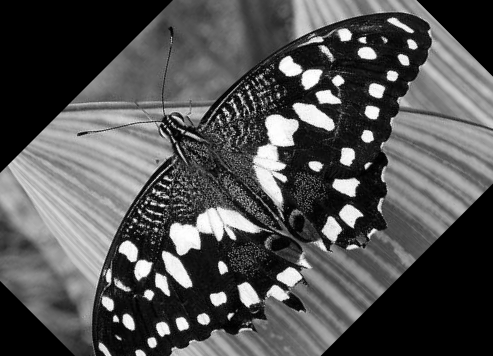

In [18]:
test_gray = cv.cvtColor(test_image, cv.COLOR_RGB2GRAY)
cv2_imshow(test_gray)

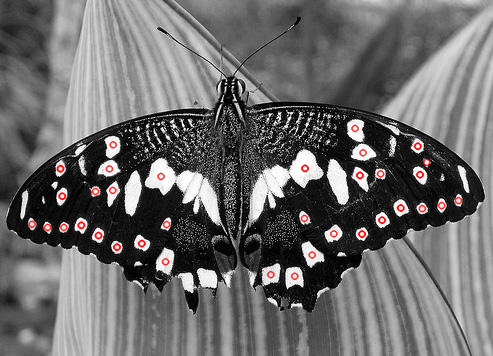

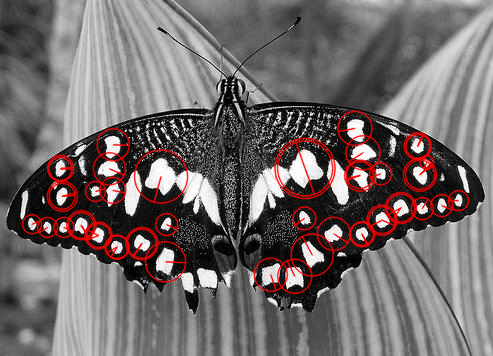

Number of Keypoints in the Training Image:  48


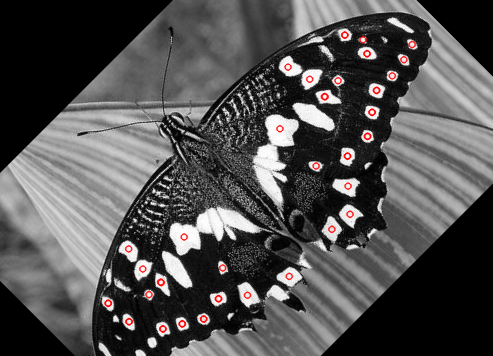

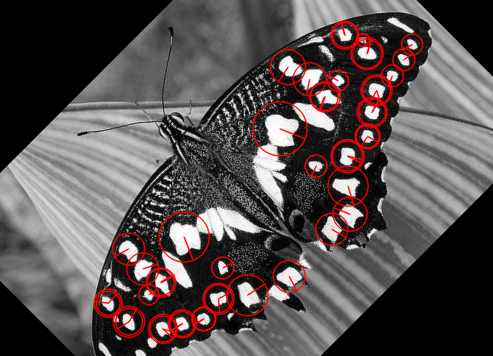

Number of Keypoints Detected In the Test Image:  47


In [22]:
# set the Hessian threshold to 50000 for illustration
# recommended to set it as 300 - 500 for actual case
# surf = cv.xfeatures2d.SURF_create(500)
surf = cv.xfeatures2d.SURF_create(50000)

# compute the interest points
train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

# draw the interest points for the training image
cv.drawKeypoints(training_gray, train_keypoints, keypoints_without_size, color = (0, 0, 255))
cv.drawKeypoints(training_gray, train_keypoints, keypoints_with_size, color = (0, 0, 255), flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


keypoints_without_size_test = np.copy(test_image)
keypoints_with_size_test = np.copy(test_image)

# draw the interest points for the test image
cv.drawKeypoints(test_gray, test_keypoints, keypoints_without_size_test, color = (0, 0, 255))
cv.drawKeypoints(test_gray, test_keypoints, keypoints_with_size_test, color = (0, 0, 255), flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display the result
cv2_imshow(keypoints_without_size)
cv2_imshow(keypoints_with_size)
print("Number of Keypoints in the Training Image: ", len(train_keypoints))
cv2_imshow(keypoints_without_size_test)
cv2_imshow(keypoints_with_size_test)
print("Number of Keypoints Detected In the Test Image: ", len(test_keypoints))

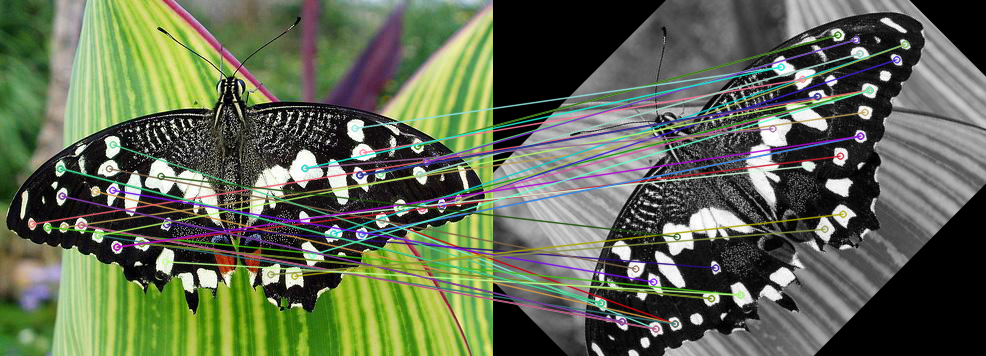

In [24]:
# match the keypoints in both images by brute-force
bf = cv.BFMatcher(cv.NORM_L1, crossCheck = False)

# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# matches = sorted(matches, key = lambda x : x.distance)

result = cv.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)
cv2_imshow(result)